In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)


#data visulalization
import matplotlib.pyplot as plt

#data preprocessing
import pandas as pd

#math operations
import numpy as np

#Mean absolute error
from sklearn.metrics import mean_absolute_error

import matplotlib.image  as mpimg

from pysolar.solar import *

import os

2.5.0


In [ ]:
#Importing data
os.chdir( "/content/drive/My Drive/Resync")

# Root directory of the project
ROOT_DIR = os.getcwd()

**Data preparation**

In [ ]:
df = pd.read_csv("singapore_irradiation.csv")
print(df.dtypes)
df.head()

PeriodEnd      object
PeriodStart    object
Period         object
Ghi             int64
dtype: object


,PeriodEnd,PeriodStart,Period,Ghi
0,2007-01-01T01:00:00Z,2007-01-01T00:45:00Z,PT15M,174
1,2007-01-01T01:15:00Z,2007-01-01T01:00:00Z,PT15M,214
2,2007-01-01T01:30:00Z,2007-01-01T01:15:00Z,PT15M,254
3,2007-01-01T01:45:00Z,2007-01-01T01:30:00Z,PT15M,294
4,2007-01-01T02:00:00Z,2007-01-01T01:45:00Z,PT15M,339


In [ ]:
df['Period'].unique()

array(['PT15M'], dtype=object)

In [ ]:
#Converting object datatype to datetime for PeriodStart 
#Dropping Period, PeriodEnd columns as time identifier is asssumed to be PeriodStart
df.drop(axis=0,columns=['Period', "PeriodEnd"],inplace=True, errors='raise')
df['PeriodStart']= pd.to_datetime(df["PeriodStart"])
df.dtypes

PeriodStart    datetime64[ns, UTC]
Ghi                          int64
dtype: object

**Data visualization**

In [ ]:
df_fe=df.copy(deep=True)

In [ ]:
df_fe['month_Start'] = [i.strftime("%b") for i in df_fe['PeriodStart']]
df_fe['year_Start'] = [i.year for i in df_fe['PeriodStart']]
df_fe['day_time_month_Start'] = [i.strftime("%d-%b-%H:%M") for i in df_fe['PeriodStart']]
df_fe['day_of_year_Start'] = [i.dayofyear for i in df_fe['PeriodStart']]
df_fe['time_of_day_Start'] = [i.strftime("%H:%M:%S") for i in df_fe['PeriodStart']]

df_fe.head()

,PeriodStart,Ghi,month_Start,year_Start,day_time_month_Start,day_of_year_Start,time_of_day_Start
0,2007-01-01 00:45:00+00:00,174,Jan,2007,01-Jan-00:45,1,00:45:00
1,2007-01-01 01:00:00+00:00,214,Jan,2007,01-Jan-01:00,1,01:00:00
2,2007-01-01 01:15:00+00:00,254,Jan,2007,01-Jan-01:15,1,01:15:00
3,2007-01-01 01:30:00+00:00,294,Jan,2007,01-Jan-01:30,1,01:30:00
4,2007-01-01 01:45:00+00:00,339,Jan,2007,01-Jan-01:45,1,01:45:00


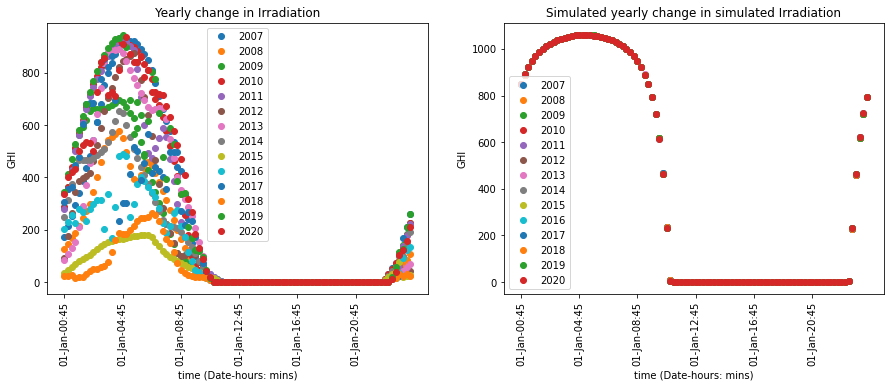

In [ ]:
latitude = 1.36442
longitude = 103.991531
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in df_fe['year_Start'].unique():
    df_1 = df_fe[df_fe['year_Start']==i]
    df_1 = df_1[df_1['day_of_year_Start']==1]
    df_1 = df_1[df_1['month_Start']=='Jan']
    df_1['simulated'] = df_1['PeriodStart'].apply(lambda x : radiation.get_radiation_direct(x, get_altitude(latitude, longitude, x)))
    ax[0].plot_date(df_1['day_time_month_Start'], df_1['Ghi'])
    ax[1].plot_date(df_1['day_time_month_Start'], df_1['simulated'])
ax[0].set_xticks(['01-Jan-00:45', '01-Jan-04:45', '01-Jan-08:45', '01-Jan-12:45', '01-Jan-16:45', '01-Jan-20:45'], minor=False)
ax[0].set_ylabel('GHI')
ax[0].set_xlabel('time (Date-hours: mins)')
ax[0].legend(df_fe['year_Start'].unique())
ax[0].set_title("Yearly change in Irradiation")

ax[1].set_xticks(['01-Jan-00:45', '01-Jan-04:45', '01-Jan-08:45', '01-Jan-12:45', '01-Jan-16:45', '01-Jan-20:45'], minor=False)
ax[1].set_ylabel('GHI')
ax[1].set_xlabel('time (Date-hours: mins)')
ax[1].legend(df_fe['year_Start'].unique())
ax[1].set_title("Simulated yearly change in simulated Irradiation")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.show()

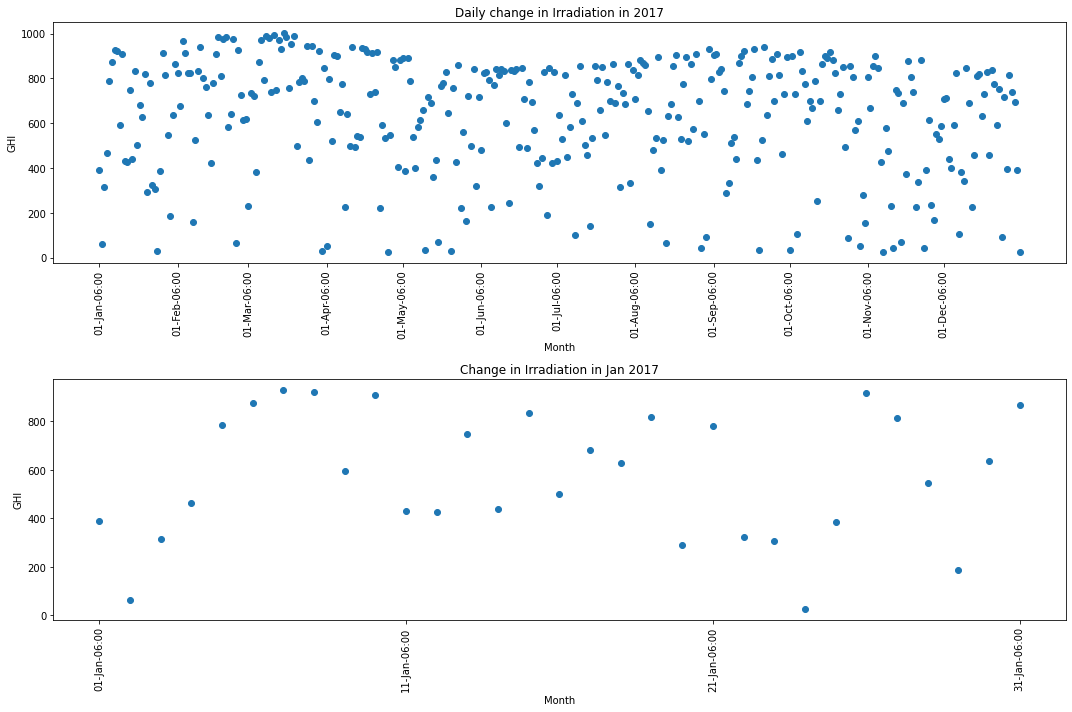

In [ ]:
from datetime import time
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(15,10))
df_1 = df_fe[df_fe['year_Start']==2017]
df_1 = df_1.iloc[range(24,len(df_1),96)]
ax[0].plot_date(df_1['day_time_month_Start'], df_1['Ghi'])
ax[0].set_xticks(['01-Jan-06:00', '01-Feb-06:00', '01-Mar-06:00', '01-Apr-06:00', '01-May-06:00', '01-Jun-06:00', '01-Jul-06:00', '01-Aug-06:00', '01-Sep-06:00', '01-Oct-06:00', '01-Nov-06:00', '01-Dec-06:00'], minor=False)
ax[0].set_ylabel('GHI')
ax[0].set_xlabel('Month')
ax[0].set_title("Daily change in Irradiation in 2017")
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)

df_1 = df_1[df_1['month_Start']=='Jan']
ax[1].plot_date(df_1['day_time_month_Start'], df_1['Ghi'])
ax[1].set_xticks(['01-Jan-06:00', '11-Jan-06:00', '21-Jan-06:00', '31-Jan-06:00'], minor=False)
ax[1].set_ylabel('GHI')
ax[1].set_xlabel('Month')
ax[1].set_title("Change in Irradiation in Jan 2017")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# ***Modelling for 2 Hour Ahead prediction with 15 minutes resolution*** 

In [ ]:
window_size = 127
batch_size = 32
shuffle_buffer_size = 5000

In [ ]:
l = len(df)
split_time = int(90*l/100)
df_train=df[:split_time]
df_test=df[split_time:split_time+8]

time_train = [i.strftime("%H:%M:%S") for i in df_train['PeriodStart']]
x_train = df_train['Ghi']
time_test = [i.strftime("%H:%M:%S") for i in df_test['PeriodStart']]
x_test = df_test['Ghi']
df_123= df['Ghi'][:split_time+8]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 8, shift=8, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 8))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-8], window[-8:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
def windowed_dataset_cnn(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 8, shift=8, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 8))
    ds = ds.map(lambda w: (w[:-8], w[8:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size, batch_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(batch_size).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [ ]:
def plot_series(time, series, forcast, format="-", start=0, end=None):
  fig, ax = plt.subplots(figsize=(15,5))
  ax.set_ylabel('GHI')
  ax.set_xlabel('time')
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
  plt.plot(time[start:end], forcast[start:end], format)
  plt.plot(time[start:end], series[start:end], format)
  plt.legend(['Forcast', 'Experimental Data'])
  plt.grid(True)

In [ ]:
def plot_history(history): 
  mae=history.history['mae']
  loss=history.history['loss']

  epochs=range(len(loss)) # Get number of epochs

  plt.plot(epochs, mae, 'r')
  plt.plot(epochs, loss, 'b')
  plt.title('MAE and Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["MAE", "Loss"])

  plt.figure()

**Regression model**

In [ ]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size]), 
    tf.keras.layers.Dense(8)
])

In [ ]:
dataset = windowed_dataset(x_train.to_numpy(), window_size, batch_size, shuffle_buffer_size)

In [ ]:
model_ann.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9), metrics=["mae"])
history_ann = model_ann.fit(dataset,epochs=300,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Save weights
model_path = os.path.join(ROOT_DIR, "Irradiance.h5")
model_ann.save_weights(model_path)
model_ann.save('my_model.h5')

#load weights
# model_ann = tf.keras.models.load_model('my_model.h5')
# print("Loading weights from ", model_path)
# model_ann.load_weights(model_path, by_name=True)

RMSE = 359.71


<Figure size 720x432 with 0 Axes>

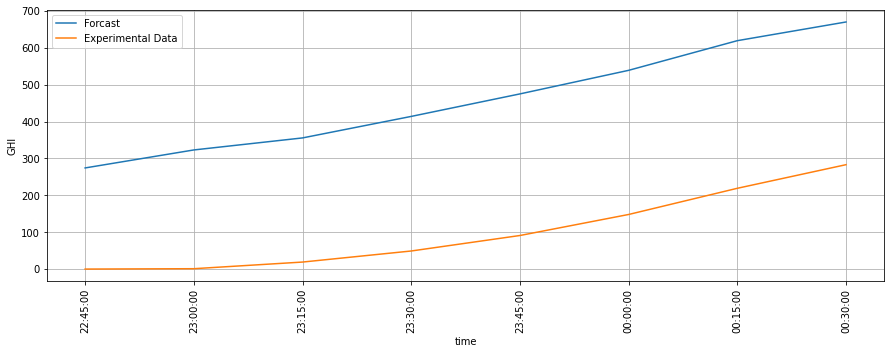

In [ ]:
ann_forecast = model_forecast(model_ann, df_123.to_numpy(), window_size, batch_size)
ann_forecast = ann_forecast[split_time - window_size:-1, -1]

ann_residuals = ann_forecast - x_test
ann_rmse = np.sqrt(np.sum(np.power(ann_residuals,2)) / len(ann_residuals))
print('RMSE = %.2f' % ann_rmse)

plt.figure(figsize=(10, 6))
plot_series(time_test, x_test, ann_forecast)

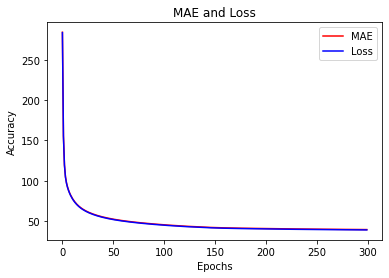

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(history_ann)

**Time Series Forecasting Model**

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset_cnn(x_train, window_size, batch_size, shuffle_buffer_size)

model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Lambda(lambda x: x * 300)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model_cnn.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])
history_cnn = model_cnn.fit(dataset,epochs=300)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
1674/1674 [==============================] - 27s 14ms/step - loss: 86.6642 - mae: 87.1549
Epoch 2/300
1674/1674 [==============================] - 24s 14ms/step - loss: 68.1818 - mae: 68.6693
Epoch 3/300
1674/1674 [==============================] - 24s 14ms/step - loss: 65.4147 - mae: 65.9006
Epoch 4/300
1674/1674 [==============================] - 24s 14ms/step - loss: 63.5251 - mae: 64.0098
Epoch 5/300
1674/1674 [==============================] - 23s 14ms/step - loss: 60.5008 - mae: 60.9836
Epoch 6/300
1674/1674 [==============================] - 24s 14ms/step - loss: 58.6016 - mae: 59.0807
Epoch 7/300
1674/1674 [==============================] - 24s 14ms/step - loss: 57.2945 - mae: 57.7694
Epoch 8/300
1674/1674 [==============================] - 24s 14ms/step - loss: 56.2938 - mae: 56.7649
Epoch 9/300
1674/1674 [==============================] - 24s 14ms/step - loss: 56.1034 - mae: 56.5723
Epoch 10/300
1674/1674 [==============================] - 24s 14ms/step - loss: 55

In [ ]:
# Save weights
model_path = os.path.join(ROOT_DIR, "Irradiance_cnn_1.h5")
model_cnn.save_weights(model_path)
model_cnn.save('my_model_cnn_1.h5')

#load weights
# model_cnn = tf.keras.models.load_model('my_model_cnn_1.h5')
# print("Loading weights from ", model_path)
# model_cnn.load_weights(model_path, by_name=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


RMSE = 385.69


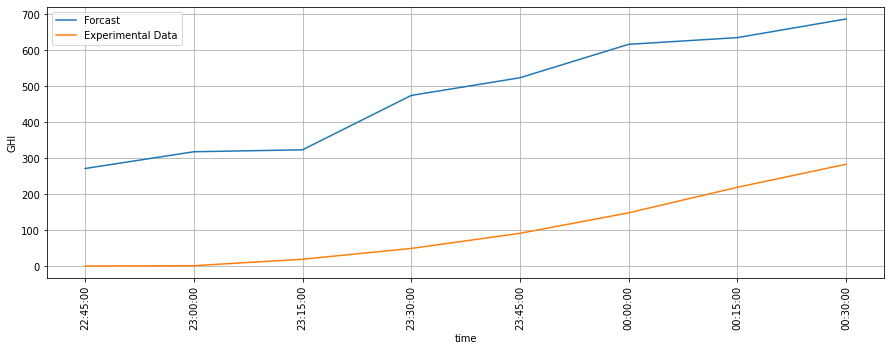

In [ ]:
lstm_forecast = model_forecast(model_cnn, df_123[..., np.newaxis], window_size, batch_size)
lstm_forecast = lstm_forecast[split_time - window_size:-1, -1, 0]

lstm_residuals = lstm_forecast - x_test
lstm_rmse = np.sqrt(np.sum(np.power(lstm_residuals,2)) / len(lstm_residuals))
print('RMSE = %.2f' % lstm_rmse)

plot_series(time_test, x_test, lstm_forecast)

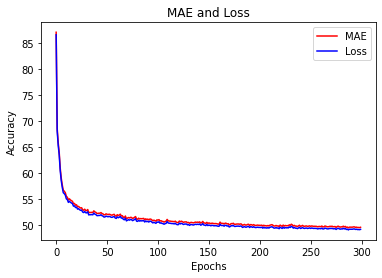

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(history_cnn)

# ***Modelling for 1 Day ahead prediction with 1 hour resolution***

In [ ]:
window_size = 41
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
df_fe=df.copy(deep=True)
df_fe= df_fe.iloc[range(0,len(df_fe),4)]
df_fe.shape

(119038, 2)

In [ ]:
l = len(df_fe)
split_time = int(90*l/100)
df_train=df_fe[:split_time]
df_test=df_fe[split_time:split_time+24]


time_train = [i.strftime("%H:%M:%S") for i in df_train['PeriodStart']]
x_train = df_train['Ghi']
time_test = [i.strftime("%H:%M:%S") for i in df_test['PeriodStart']]
x_test = df_test['Ghi']
df_123= df_fe['Ghi'][:split_time+24]

In [ ]:
def windowed_dataset_1day(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 24, shift=24, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 24))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-24], window[-24:]))
    print(dataset)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

**Regression model**

In [ ]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size]), 
    tf.keras.layers.Dense(24)
])

In [ ]:
dataset = windowed_dataset_1day(x_train.to_numpy(), window_size, batch_size, shuffle_buffer_size)

<MapDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>


In [ ]:
model_ann.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9), metrics=["mae"])
history_ann = model_ann.fit(dataset,epochs=300,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Save weights
model_path = os.path.join(ROOT_DIR, "Irradiance_perday.h5")
model_ann.save_weights(model_path)
model_ann.save('my_model_perday.h5')

#load weights
# model_ann = tf.keras.models.load_model('my_model_perday.h5')
# print("Loading weights from ", model_path)
# model_ann.load_weights(model_path, by_name=True)

RMSE = 641.07


<Figure size 720x432 with 0 Axes>

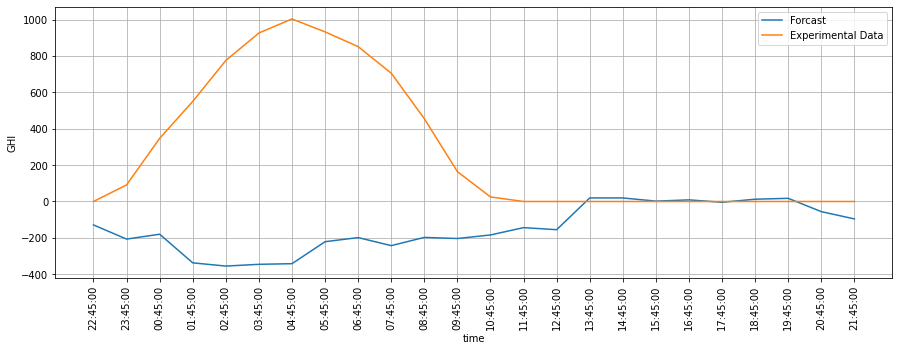

In [47]:
ann_forecast = model_forecast(model_ann, df_123.to_numpy(), window_size, batch_size)
ann_forecast = ann_forecast[split_time - window_size:-1, -1]

ann_residuals = ann_forecast - x_test
ann_rmse = np.sqrt(np.sum(np.power(ann_residuals,2)) / len(ann_residuals))
print('RMSE = %.2f' % ann_rmse)

plt.figure(figsize=(10, 6))
plot_series(time_test, x_test, ann_forecast)

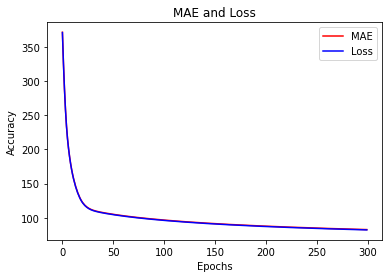

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(history_ann)

**Time Series Forecasting**

In [ ]:
def windowed_dataset_cnn_1day(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 24, shift=24, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 24))
    # ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-24], w[24:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset_cnn_1day(x_train, window_size, batch_size, shuffle_buffer_size)

model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(24),
  tf.keras.layers.Lambda(lambda x: x * 300)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model_cnn.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])
history = model_cnn.fit(dataset,epochs=300)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
140/140 [==============================] - 4s 10ms/step - loss: 211.0118 - mae: 211.5082
Epoch 2/300
140/140 [==============================] - 1s 9ms/step - loss: 172.0275 - mae: 172.5217
Epoch 3/300
140/140 [==============================] - 1s 9ms/step - loss: 136.4356 - mae: 136.9297
Epoch 4/300
140/140 [==============================] - 1s 10ms/step - loss: 111.8938 - mae: 112.3876
Epoch 5/300
140/140 [==============================] - 1s 9ms/step - loss: 98.0215 - mae: 98.5148
Epoch 6/300
140/140 [==============================] - 1s 9ms/step - loss: 90.4159 - mae: 90.9083
Epoch 7/300
140/140 [==============================] - 1s 9ms/step - loss: 86.7323 - mae: 87.2241
Epoch 8/300
140/140 [==============================] - 1s 10ms/step - loss: 84.6604 - mae: 85.1509
Epoch 9/300
140/140 [==============================] - 1s 10ms/step - loss: 83.1450 - mae: 83.6338
Epoch 10/300
140/140 [==============================] - 1s 10ms/step - loss: 82.8471 - mae: 83.3353
Epoch 

In [ ]:
# Save weights
model_path = os.path.join(ROOT_DIR, "Irradiance_cnn_perday.h5")
model_cnn.save_weights(model_path)
model_cnn.save('my_model_cnn_perday.h5')

#load weights
# model_cnn = tf.keras.models.load_model('my_model_cnn_perday.h5')
# print("Loading weights from ", model_path)
# model_cnn.load_weights(model_path, by_name=True)

RMSE = 136.00


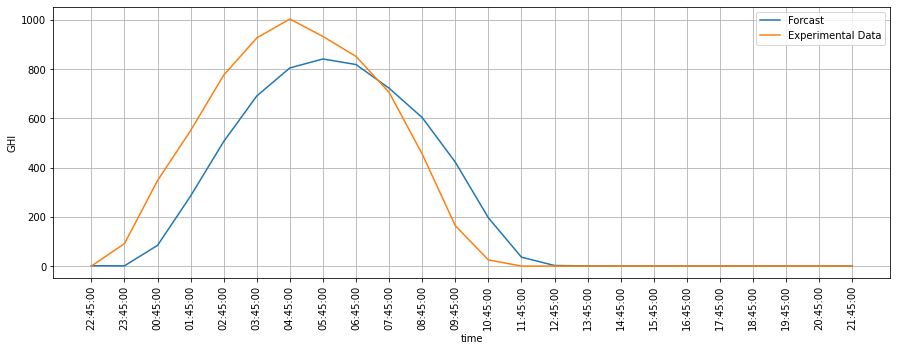

In [46]:
lstm_forecast = model_forecast(model_cnn, df_123[..., np.newaxis], window_size, batch_size)
lstm_forecast = lstm_forecast[split_time - window_size:-1, -1, 0]

lstm_residuals = lstm_forecast - x_test
lstm_rmse = np.sqrt(np.sum(np.power(lstm_residuals,2)) / len(lstm_residuals))
print('RMSE = %.2f' % lstm_rmse)

plot_series(time_test, x_test, lstm_forecast)

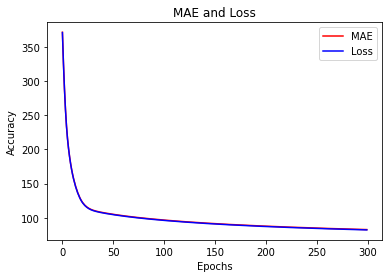

<Figure size 432x288 with 0 Axes>

In [45]:
plot_history(history_ann)